# Personal simulations before migrating to the full Trachoma model

## Birth and death model

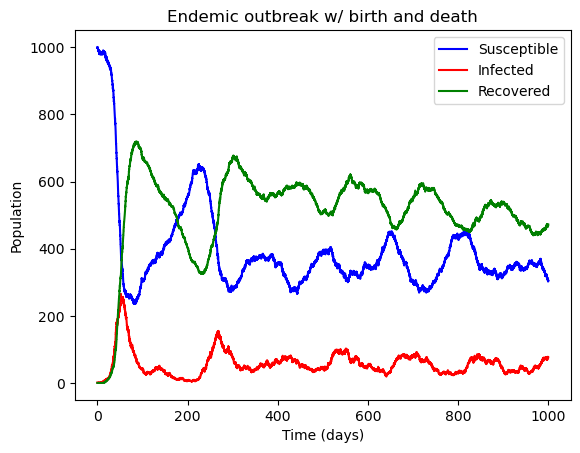

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_outbreak(S0, I0, R0, beta, gamma, mu, nu, total_time):
    
    S, I, R, t = S0, I0, R0, 0
    
    S_vals = [S]
    I_vals = [I]
    R_vals = [R]
    times = [t]
    
    while t < total_time:
        
        N = S+I+R
        
        rates = np.array([beta*S*I/N, # Infection
                 gamma*I,    # Recovery
                 nu*N,       # Birth
                 mu*S,       # S dies
                 mu*I,       # I dies
                 mu*R        # R dies
                ])
        
        total_rate = sum(rates) 
        if total_rate == 0:
            break  
        dt = np.random.exponential(1/total_rate)
        t += dt
        
        event = np.random.choice(len(rates), p = rates/total_rate)
        
        if event == 0:
            S, I = S-1, I+1
        elif event == 1:
            I, R = I-1, R+1
        elif event == 2:
            S += 1
        elif event == 3:
            S -= 1
        elif event == 4:
            I -= 1
        elif event == 5:
            R -= 1
            
        S_vals.append(S)
        I_vals.append(I)
        R_vals.append(R)
        times.append(t)
        
    return S_vals, I_vals, R_vals, times
            
# rate parameters
beta = 0.3
gamma = 0.1
mu = 0.01
nu = 0.01

# run parameters
S0 = 999
I0 = 1
R0 = 0
total_time = 1000

sus, inf, rec, time = simulate_outbreak(S0, I0, R0, beta, gamma, mu, nu, total_time)

plt.plot(time, sus, color = 'blue', label = 'Susceptible')
plt.plot(time, inf, color = 'red', label = 'Infected')
plt.plot(time, rec, color = 'green', label = 'Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Endemic outbreak w/ birth and death')
plt.legend()

### Determining parameters to achieve a specific equilibrium level of infections

In [ ]:
def 

### First attempts at annual mass vaccination, under a deterministic model

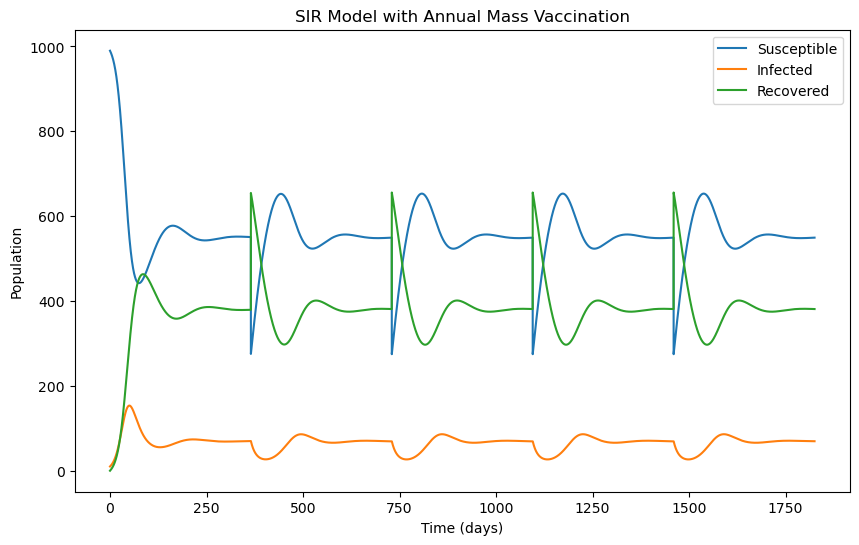

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rs = 1/120         # re-susceptibility rate = waning immunity
beta = 0.2         # infection rate
gamma = 0.1        # recovery rate
mu = 0.01          # birth-death rate
v_rate = 0.5       # vaccination coverage when administered
N = 1000           # population size

# Initial conditions
S0 = 990           
I0 = 10            
R0 = 0            

# Time parameters
T = 365*5            # number of days
dt = 0.1           # time step for numerical
days_per_year = 365
t = np.linspace(0, T, int(T/dt))

# compartment populations
S = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))

# initial conditions
S[0] = S0
I[0] = I0
R[0] = R0

# function to apply vaccination
def apply_vaccination(S, R, v_rate):
    vaccinated = v_rate * S
    S -= vaccinated
    R += vaccinated
    return S, R

# numerical approach to solving the system of ODEs
for i in range(1, len(t)):
    if i % int(days_per_year/dt) == 0:  # vaccinate each year, excluding day 0
        S[i-1], R[i-1] = apply_vaccination(S[i-1], R[i-1], v_rate)
    
    dSdt = mu * (S[i-1] + I[i-1] + R[i-1]) - beta * S[i-1] * I[i-1] / N - mu * S[i-1] + rs * R[i-1]
    dIdt = beta * S[i-1] * I[i-1] / N - gamma * I[i-1] - mu * I[i-1]
    dRdt = gamma * I[i-1] - mu * R[i-1] - rs * R[i-1]
    
    S[i] = S[i-1] + dSdt * dt
    I[i] = I[i-1] + dIdt * dt
    R[i] = R[i-1] + dRdt * dt

plt.figure(figsize=(10,6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model with Annual Mass Vaccination')
plt.legend()
plt.show()


## Individual-based stochastic models

### Just SIR version

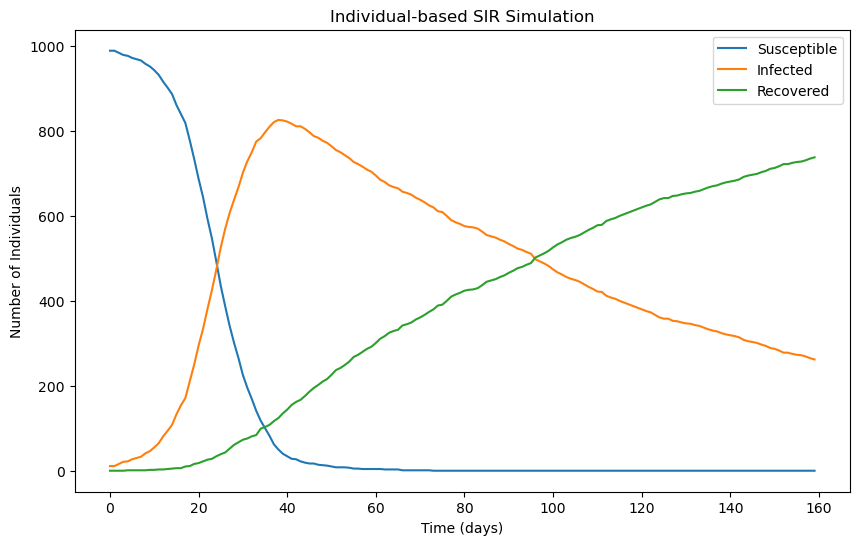

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

# parameters
population_size = 1000
initial_infected = 10
contact_rate = 0.01
transmission_probability = 0.1
recovery_rate = 0.01
simulation_days = 160
age_groups = [0, 1, 2, 3, 4, 5]  # arbitrary groups for now
infectivity_by_age = [0.35, 0.3, 0.25, 0.2, 0.15, 0.1]  # infectivity decreases with age

# states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

# initialize population
population = []
for k in range(population_size):
    age = random.choice(age_groups)
    state = SUSCEPTIBLE
    if initial_infected > 0:
        state = INFECTED
        initial_infected -= 1
    population.append({'state': state, 'age': age, 'infectivity': infectivity_by_age[age]})
random.shuffle(population)

# store counts after each day
susceptible_count = []
infected_count = []
recovered_count = []

# simulate each day of outbreak
for day in range(simulation_days):

    for i in range(population_size):
        if population[i]['state'] == INFECTED:
            # Check if the infected person recovers
            if random.random() < recovery_rate:
                population[i]['state'] = RECOVERED
            else:
                # Try to infect susceptible individuals
                for c in range(int(contact_rate * population_size)):  # number of contacts per day
                    contact = random.choice(population)
                    if contact['state'] == SUSCEPTIBLE and random.random() < (transmission_probability * population[i]['infectivity']):
                        contact['state'] = INFECTED

    # Record counts
    susceptible_count.append(len([person for person in population if person['state'] == SUSCEPTIBLE]))
    infected_count.append(len([person for person in population if person['state'] == INFECTED]))
    recovered_count.append(len([person for person in population if person['state'] == RECOVERED]))

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(susceptible_count, label='Susceptible')
plt.plot(infected_count, label='Infected')
plt.plot(recovered_count, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title('Individual-based SIR Simulation')
plt.legend()
plt.show()


### Adding in birth/death and annual MDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt